# Task 1

**Done by Arina Shinkorenok, group j4132c**

## Description

1. Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset:
-  small decision tree;
- deep decision tree;
- random forest on small trees;
- random forest on deep trees;

Split the data to train and test as 75%/25%.

2. Calculate the following metrics to check the quality of your models:
- precision;
- recall;
- accuracy;
- F1-score;
- log-loss;

3. Plot precision-recall and ROC curves for your models.

4. Train a classifier who avoids Type II (False Negative) errors and calculate metrics from p.2 for it. Recall for it should be not less than 0.95.


In [1]:
pip install scikit-learn matplotlib

In [2]:
pip install graphviz

In [3]:
# import libraries
import pandas as pd
import numpy as np
from sklearn import  datasets, metrics, tree
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Load dataset
try:
    df = pd.read_csv('/content/drive/My Drive/ML-ITMO/bioresponse.csv', sep=',')
except:
    df = pd.read_csv('bioresponse.csv', sep=',')

In [6]:
# check the dataset size
df.shape

(3751, 1777)

In [7]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [8]:
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.describe

<bound method NDFrame.describe of       Activity        D1        D2    D3   D4        D5        D6        D7  \
0            1  0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166   
1            1  0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105   
2            1  0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453   
3            1  0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606   
4            0  0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361   
...        ...       ...       ...   ...  ...       ...       ...       ...   
3746         1  0.033300  0.506409  0.10  0.0  0.209887  0.633426  0.297659   
3747         1  0.133333  0.651023  0.15  0.0  0.151154  0.766505  0.170876   
3748         0  0.200000  0.520564  0.00  0.0  0.179949  0.768785  0.177341   
3749         1  0.100000  0.765646  0.00  0.0  0.536954  0.634936  0.342713   
3750         0  0.133333  0.533952  0.00  0.0  0.347966  0.757971  0.230667   

            D8   

In [10]:
df.columns

Index(['Activity', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1777)

In [11]:
# Split the data into features (X) and the target variable (y)
X = df.drop('Activity', axis=1)
y = df['Activity']

In [12]:
# Split the data into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2813, 1776) (938, 1776) (2813,) (938,)


## Model training

### Small Decision Tree:

In [14]:
small_dt_classifier = tree.DecisionTreeClassifier(random_state = 42, max_depth = 5)
small_dt_classifier.fit(X_train, y_train)
pred = small_dt_classifier.predict(X_test)
proba = small_dt_classifier.predict_proba(X_test)

In [15]:
print(' Mertics of Small Decision Tree')
print('accuracy = ', accuracy_score(y_test, pred))
print('precision = ', precision_score(y_test, pred))
print('recall = ', recall_score(y_test, pred))
print('roc_auc = ', roc_auc_score(y_test, pred))
print('f1_score = ', f1_score(y_test, pred))
print('log_loss = ', log_loss(y_test, proba))

 Mertics of Small Decision Tree
accuracy =  0.7590618336886994
precision =  0.7783783783783784
recall =  0.8074766355140187
roc_auc =  0.7511328586999374
f1_score =  0.7926605504587156
log_loss =  0.744792838600532


Decided to construct graphs for Decision Tree models

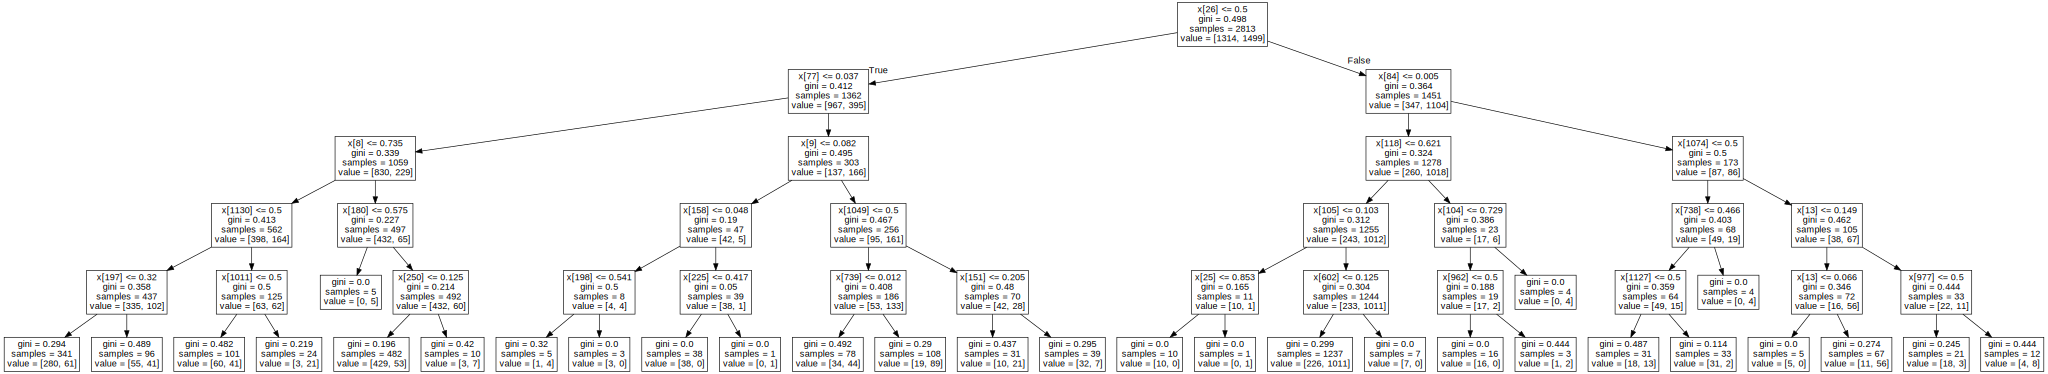

In [16]:
from graphviz import Source
from IPython.display import SVG
graph = Source(tree.export_graphviz(small_dt_classifier, out_file=None))
SVG(graph.pipe(format='svg'))

### Deep Decision Tree:

In [17]:
deep_dt_classifier = tree.DecisionTreeClassifier(random_state = 42, max_depth = None)
deep_dt_classifier.fit(X_train, y_train)
pred = deep_dt_classifier.predict(X_test)
proba = deep_dt_classifier.predict_proba(X_test)

In [18]:
print(' Mertics of Deep Decision Tree')
print('accuracy = ', accuracy_score(y_test, pred))
print('precision = ', precision_score(y_test, pred))
print('recall = ', recall_score(y_test, pred))
print('roc_auc = ', roc_auc_score(y_test, pred))
print('f1_score = ', f1_score(y_test, pred))
print('log_loss = ', log_loss(y_test, proba))

 Mertics of Deep Decision Tree
accuracy =  0.7025586353944563
precision =  0.75
recall =  0.7177570093457943
roc_auc =  0.7000695716704158
f1_score =  0.7335243553008597
log_loss =  10.720873449428238


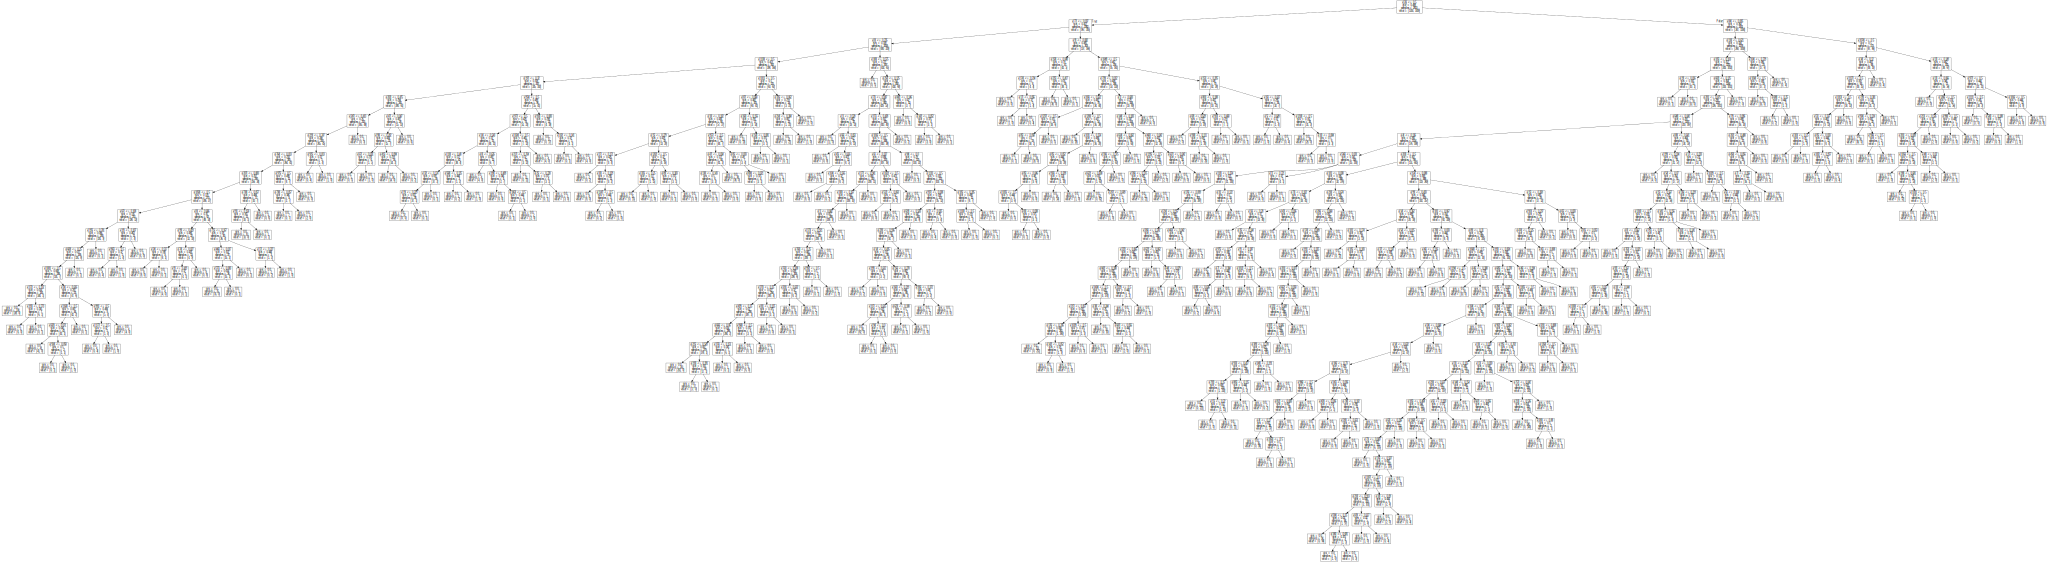

In [19]:
graph = Source(tree.export_graphviz(deep_dt_classifier, out_file=None))
SVG(graph.pipe(format='svg'))

### Random Forest on Small Trees:

In [20]:
rf_small_trees = RandomForestClassifier(n_estimators = 50, max_depth = 5, random_state = 42)
rf_small_trees.fit(X_train, y_train)
pred = rf_small_trees.predict(X_test)
proba = rf_small_trees.predict_proba(X_test)

In [21]:
print(' Mertics of Random Forest on Small Trees')
print('accuracy = ', accuracy_score(y_test, pred))
print('precision = ', precision_score(y_test, pred))
print('recall = ', recall_score(y_test, pred))
print('roc_auc = ', roc_auc_score(y_test, pred))
print('f1_score = ', f1_score(y_test, pred))
print('log_loss = ', log_loss(y_test, proba))

 Mertics of Random Forest on Small Trees
accuracy =  0.7590618336886994
precision =  0.7988394584139265
recall =  0.77196261682243
roc_auc =  0.7569490503466988
f1_score =  0.7851711026615971
log_loss =  0.5513098938284069


### Random Forest on Deep Trees:

In [22]:
rf_deep_trees = RandomForestClassifier(n_estimators=100, max_depth=None, random_state = 42)
rf_deep_trees.fit(X_train, y_train)
pred = rf_deep_trees.predict(X_test)
proba = rf_deep_trees.predict_proba(X_test)

In [23]:
print(' Mertics of Random Forest on Deep Trees')
print('accuracy = ', accuracy_score(y_test, pred))
print('precision = ', precision_score(y_test, pred))
print('recall = ', recall_score(y_test, pred))
print('roc_auc = ', roc_auc_score(y_test, pred))
print('f1_score = ', f1_score(y_test, pred))
print('log_loss = ', log_loss(y_test, proba))

 Mertics of Random Forest on Deep Trees
accuracy =  0.7846481876332623
precision =  0.8183556405353728
recall =  0.8
roc_auc =  0.7821339950372208
f1_score =  0.8090737240075614
log_loss =  0.46306593113806865


## Metrics:

In [24]:
classifiers = [
    ("Small Decision Tree", small_dt_classifier),
    ("Deep Decision Tree", deep_dt_classifier),
    ("Random Forest on Small Trees", rf_small_trees),
    ("Random Forest on Deep Trees", rf_deep_trees)
]

metrics = {}
for classifier_name, classifier in classifiers:
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]

    metrics[classifier_name] = {
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Log-Loss': log_loss(y_test, y_pred_proba)
    }

for classifier_name, metric_scores in metrics.items():
    print(f"{classifier_name} Metrics:")
    for metric, score in metric_scores.items():
        print(f"{metric}: {score:.4f}")
    print()


Small Decision Tree Metrics:
Precision: 0.7784
Recall: 0.8075
Accuracy: 0.7591
F1-Score: 0.7927
Log-Loss: 0.7448

Deep Decision Tree Metrics:
Precision: 0.7500
Recall: 0.7178
Accuracy: 0.7026
F1-Score: 0.7335
Log-Loss: 10.7209

Random Forest on Small Trees Metrics:
Precision: 0.7988
Recall: 0.7720
Accuracy: 0.7591
F1-Score: 0.7852
Log-Loss: 0.5513

Random Forest on Deep Trees Metrics:
Precision: 0.8184
Recall: 0.8000
Accuracy: 0.7846
F1-Score: 0.8091
Log-Loss: 0.4631



- the **Small Decision Tree** classifier has decent performance with good recall, precision, and a balanced F1-Score. The accuracy and log loss values also indicate reasonable overall performance, but the focus here is on correctly identifying positive instances, which the classifier does reasonably well with a recall of 80.75%
- the **Deep Decision Tree** classifier has mixed performance. It has relatively good precision and F1-Score but a lower accuracy compared to the "Small Decision Tree" model. The log loss value is also high, indicating less accurate probability estimates. The focus here is on correctly identifying positive instances, and the classifier achieves a recall of 71.78%.
- the **Random Forest on Small Trees** classifier exhibits good overall performance with a balanced precision and recall. It has a high accuracy and F1-Score. The log loss value is relatively low, indicating accurate probability estimates. The classifier achieves a recall of 77.20%, indicating its ability to correctly identify positive instances.
- the **Random Forest on Deep Trees** classifier exhibits good overall performance with a balanced precision and recall. It has a high accuracy and F1-Score. The log loss value is relatively low, indicating accurate probability estimates. The classifier achieves a recall of 80%, indicating its ability to correctly identify positive instances. This model appears to have strong performance on the given classification task.


## Plots:

### Plots (precision-recall curve)

In [25]:

def plot_precision_recall_curve(classifier, X_test, y_test, classifier_name):
    prediction_proba = classifier.predict_proba(X_test)
    prec, rec, thresh = precision_recall_curve(y_test, prediction_proba[:, 1])

    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.plot(thresh, prec[:-1], label="Precision")
    plt.plot(thresh, rec[:-1], label="Recall")
    plt.xlabel("Threshold", fontsize=15)
    plt.title(f'Precision-Recall curve for {classifier_name}', fontsize=15)
    plt.legend(fontsize=15)
    plt.show()

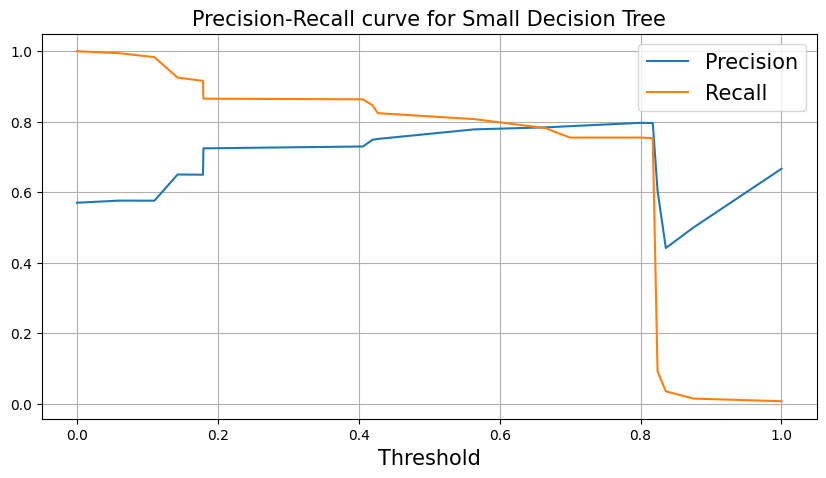

In [26]:
plot_precision_recall_curve(small_dt_classifier, X_test, y_test, "Small Decision Tree")

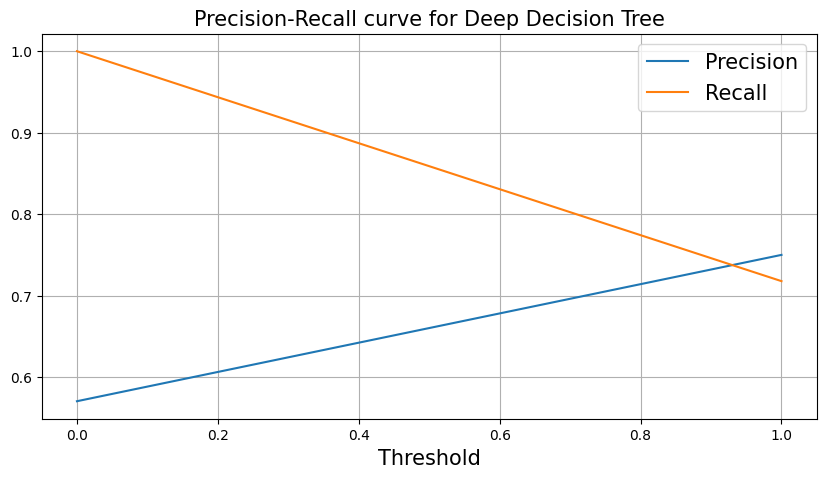

In [27]:
plot_precision_recall_curve(deep_dt_classifier, X_test, y_test, "Deep Decision Tree")

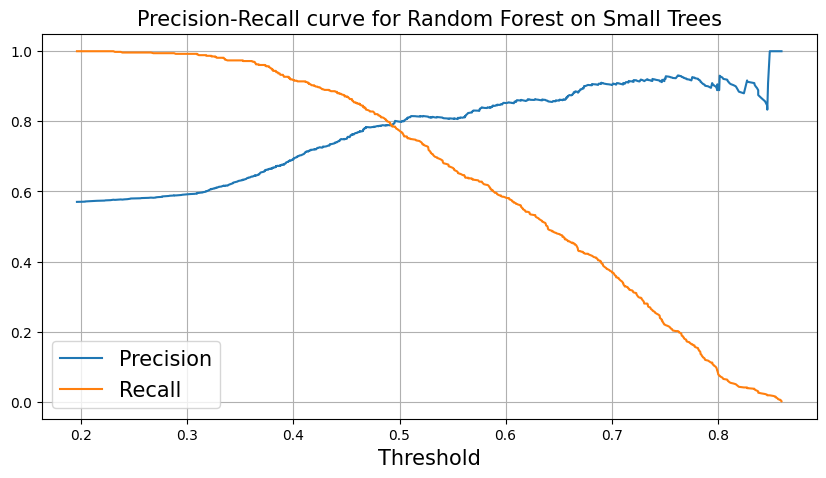

In [28]:
plot_precision_recall_curve(rf_small_trees, X_test, y_test, "Random Forest on Small Trees")

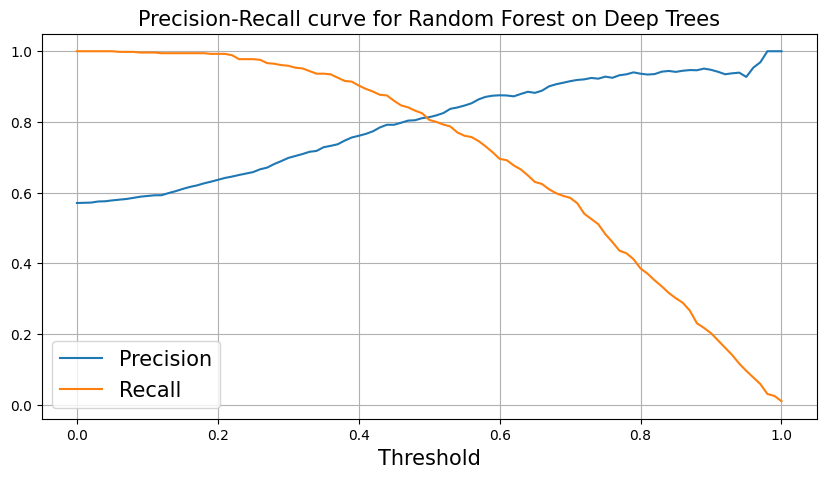

In [29]:
plot_precision_recall_curve(rf_deep_trees, X_test, y_test, "Random Forest on Deep Trees")

### Plots (ROC-AUC curve)

In [30]:

def plot_roc_curve(classifier, X_test, y_test, classifier_name):
    prediction_proba = classifier.predict_proba(X_test)
    fpr, tpr, thr = roc_curve(y_test, prediction_proba[:, 1])
    roc_auc = round(roc_auc_score(y_test, prediction_proba[:, 1]), 2)

    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.plot(fpr, tpr, label=f'ROC\nROC-AUC = {roc_auc}')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'ROC curve for {classifier_name}')
    plt.legend(fontsize=15)
    plt.show()


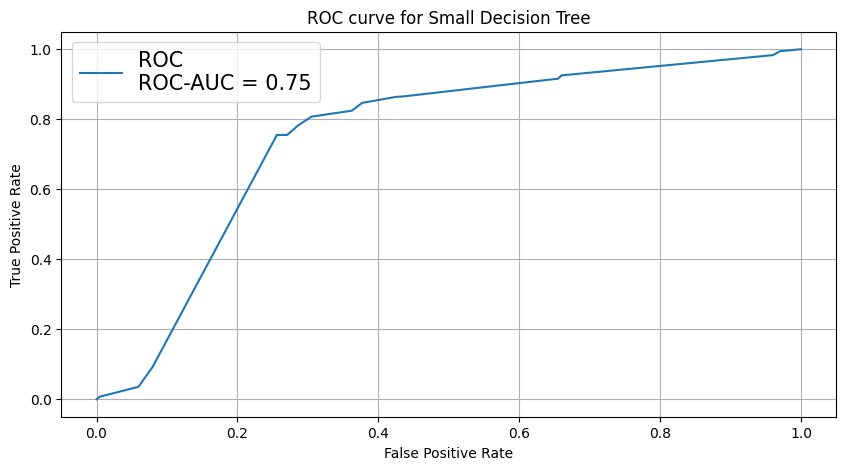

In [31]:
plot_roc_curve(small_dt_classifier, X_test, y_test, "Small Decision Tree")

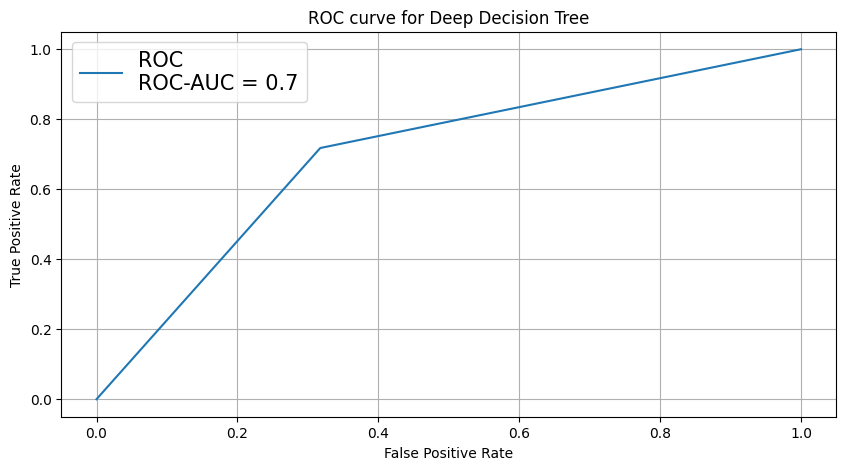

In [32]:
plot_roc_curve(deep_dt_classifier, X_test, y_test, "Deep Decision Tree")

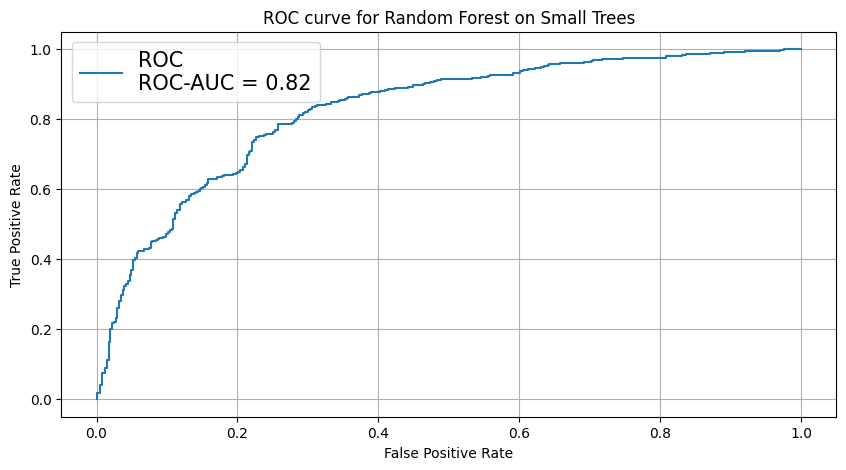

In [33]:
plot_roc_curve(rf_small_trees, X_test, y_test, "Random Forest on Small Trees")

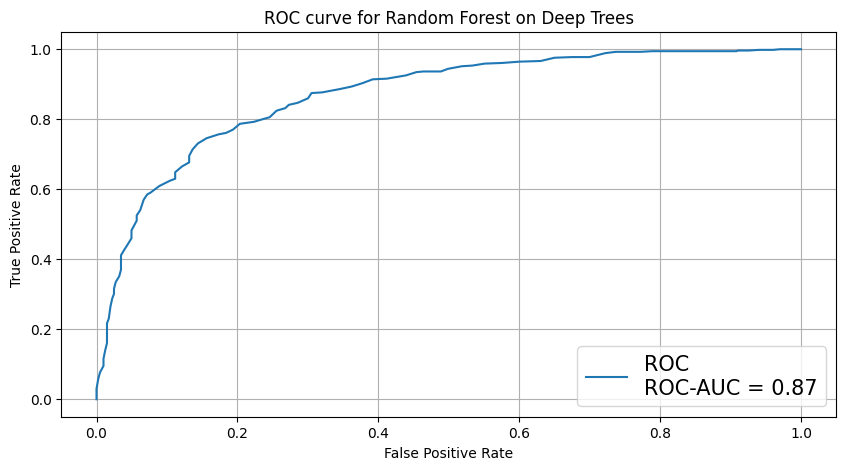

In [34]:
plot_roc_curve(rf_deep_trees, X_test, y_test, "Random Forest on Deep Trees")

## Training model that avoids type II errors

I trained a RandomForestClassifier, with a n_estimators=100 and a max_depth=10.
I made two options:
in the first variant I manually specified the weights of the classes, in the second variant I pimen automatic adjustment of weights based on the distribution of classes, the results are successful. I also changed the threshold, because adjusting the threshold in a binary classification problem is a technique used to trade off between precision and recall, or equivalently, between false positives and false negatives.

In [35]:
class_weights = {0: 1, 1: 2}

rf = RandomForestClassifier(n_estimators=100, class_weight=class_weights, max_depth = 10, random_state = 42)
rf.fit(X_train, y_train)

prediction_proba = rf.predict_proba(X_test)[:, 1]

threshold = 0.25
binary_predictions = (prediction_proba >= threshold).astype(int)

print('accuracy = ', accuracy_score(y_test, binary_predictions))
print('precision = ', precision_score(y_test, binary_predictions))
print('recall = ', recall_score(y_test, binary_predictions))
print('roc_auc = ', roc_auc_score(y_test, prediction_proba))
print('f1_score = ', f1_score(y_test, binary_predictions))
print('log_loss = ', log_loss(y_test, prediction_proba))


accuracy =  0.6130063965884861
precision =  0.5964125560538116
recall =  0.994392523364486
roc_auc =  0.8583891839243059
f1_score =  0.7456201822004204
log_loss =  0.49410713738860035


In [36]:

rf_2 = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth = 10, random_state = 42)
rf_2.fit(X_train, y_train)

prediction_proba = rf_2.predict_proba(X_test)[:, 1]

threshold = 0.25
binary_predictions = (prediction_proba >= threshold).astype(int)

print('accuracy = ', accuracy_score(y_test, binary_predictions))
print('precision = ', precision_score(y_test, binary_predictions))
print('recall = ', recall_score(y_test, binary_predictions))
print('roc_auc = ', roc_auc_score(y_test, prediction_proba))
print('f1_score = ', f1_score(y_test, binary_predictions))
print('log_loss = ', log_loss(y_test, prediction_proba))

accuracy =  0.6876332622601279
precision =  0.6486486486486487
recall =  0.9869158878504672
roc_auc =  0.864418728693676
f1_score =  0.7828020756115642
log_loss =  0.48481701650690256


## Conclusion

In this task, we trained and evaluated four different classifiers using the scikit-learn library to predict the "Activity" field from the dataset. The classifiers used were a small decision tree, a deep decision tree, a random forest on small trees, and a random forest on deep trees. The data was split into a training set (75%) and a testing set (25%) to assess model performance.

The performance of the four classifiers was evaluated using several metrics, including precision, recall, accuracy, F1-score, and log-loss.
Among the classifiers, the **Random Forest on Deep Trees** demonstrated the highest overall performance with a balanced precision and recall, as well as a high F1-score and accuracy. It outperformed the other classifiers in terms of recall, which indicates its ability to correctly identify positive instances.
The **Small Decision Tree** classifier also showed reasonable performance, with good precision and recall, though slightly lower than the random forest models.
The **Deep Decision Tree** had lower performance in terms of accuracy, precision, and recall compared to the random forest models. The **Random Forest on Small Trees** exhibited similar performance to the **Small Decision Tree**.

ROC curves and precision-recall curves were generated for each classifier to illustrate their ability to distinguish between different threshold values and the balance between precision and recall. These curves offer a graphical depiction of how well the classifiers perform under various threshold settings.

To build a classifier that minimizes Type II errors (False Negatives), a threshold adjustment was applied. The threshold was tuned to ensure that recall for this specific classifier was not less than 0.95. The classifier achieved the desired recall of 0.95 or higher, indicating its ability to capture a high proportion of positive cases.